# Валидация данных и оценка модели
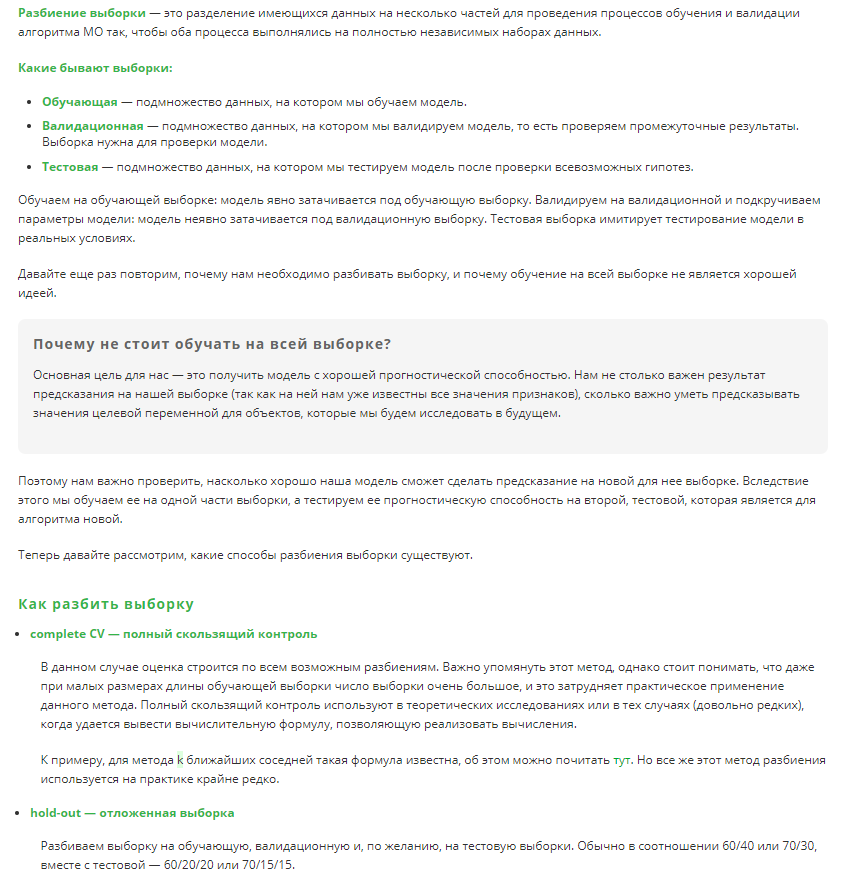

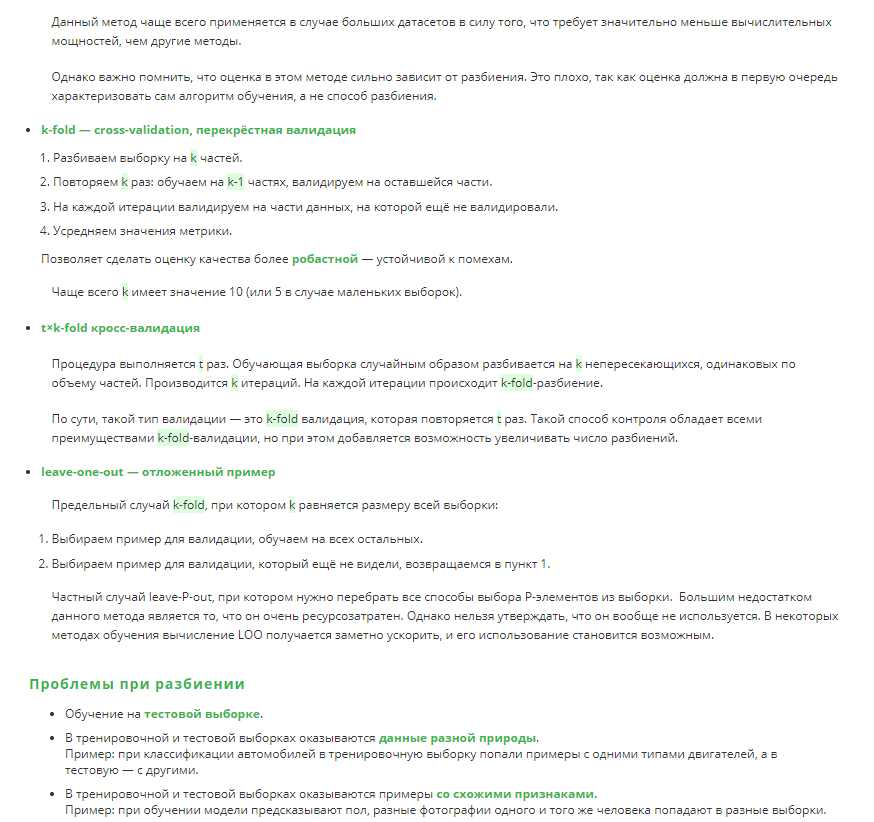

# Практика
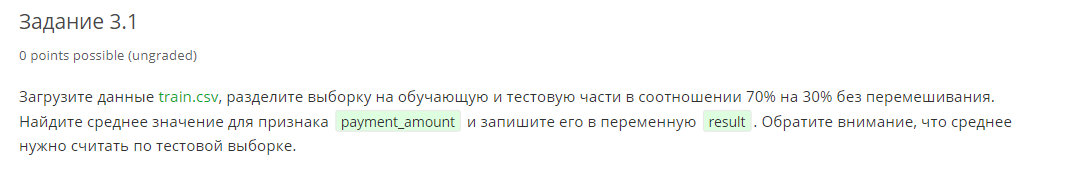

In [3]:
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
train, test = train_test_split(vis_data, test_size=0.3, shuffle=False)
result = test['payment_amount'].mean()

# Метрики качества регрессии
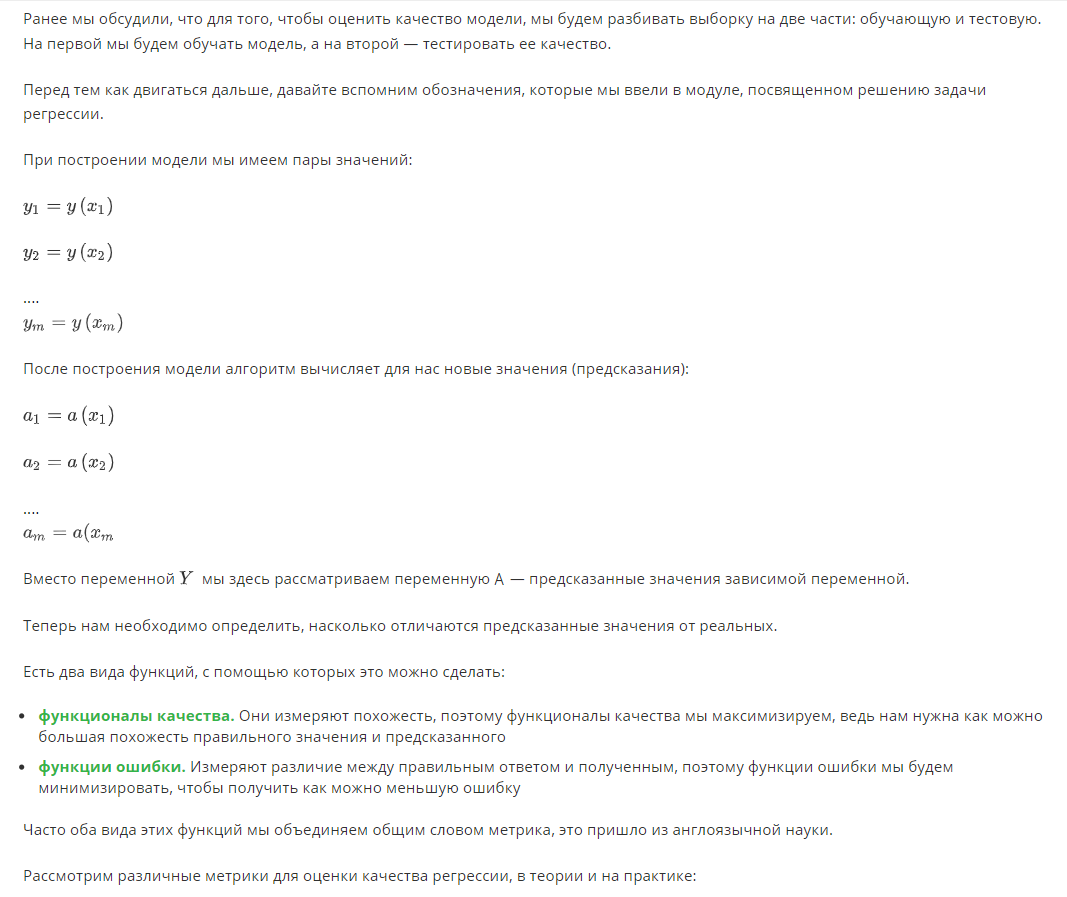

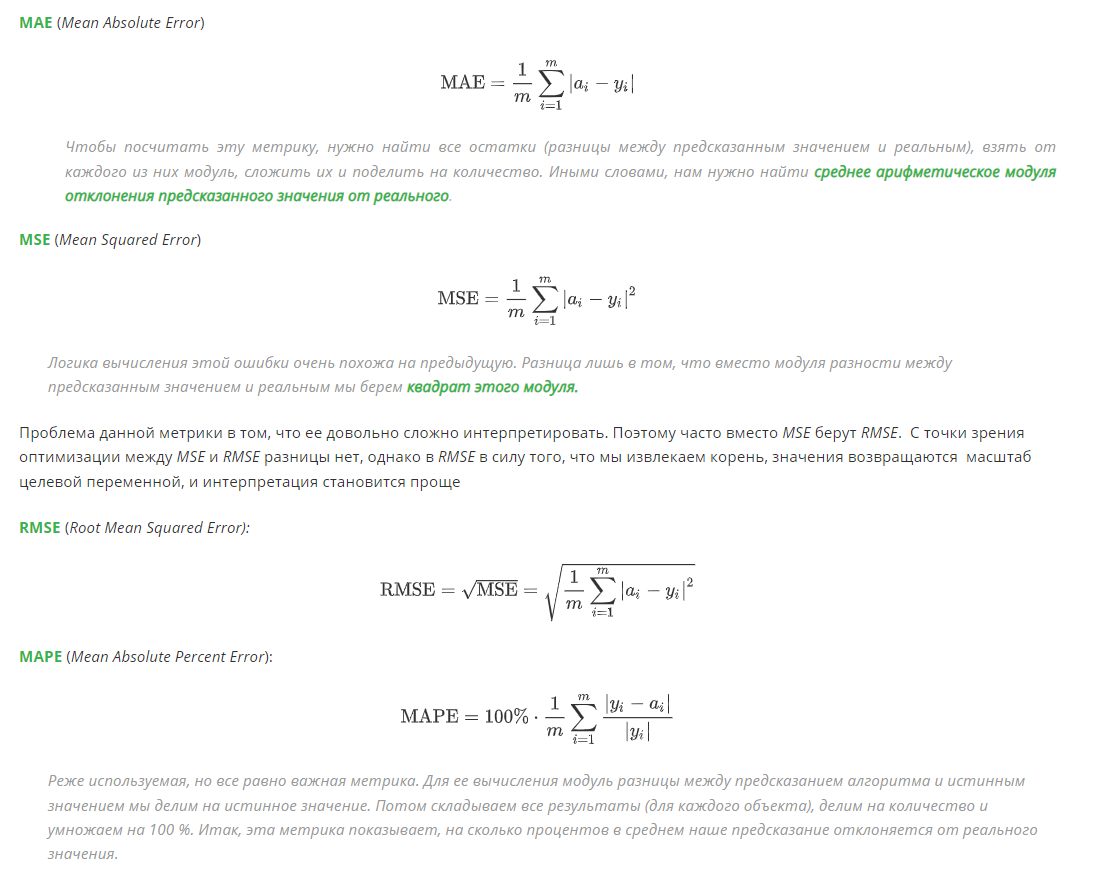

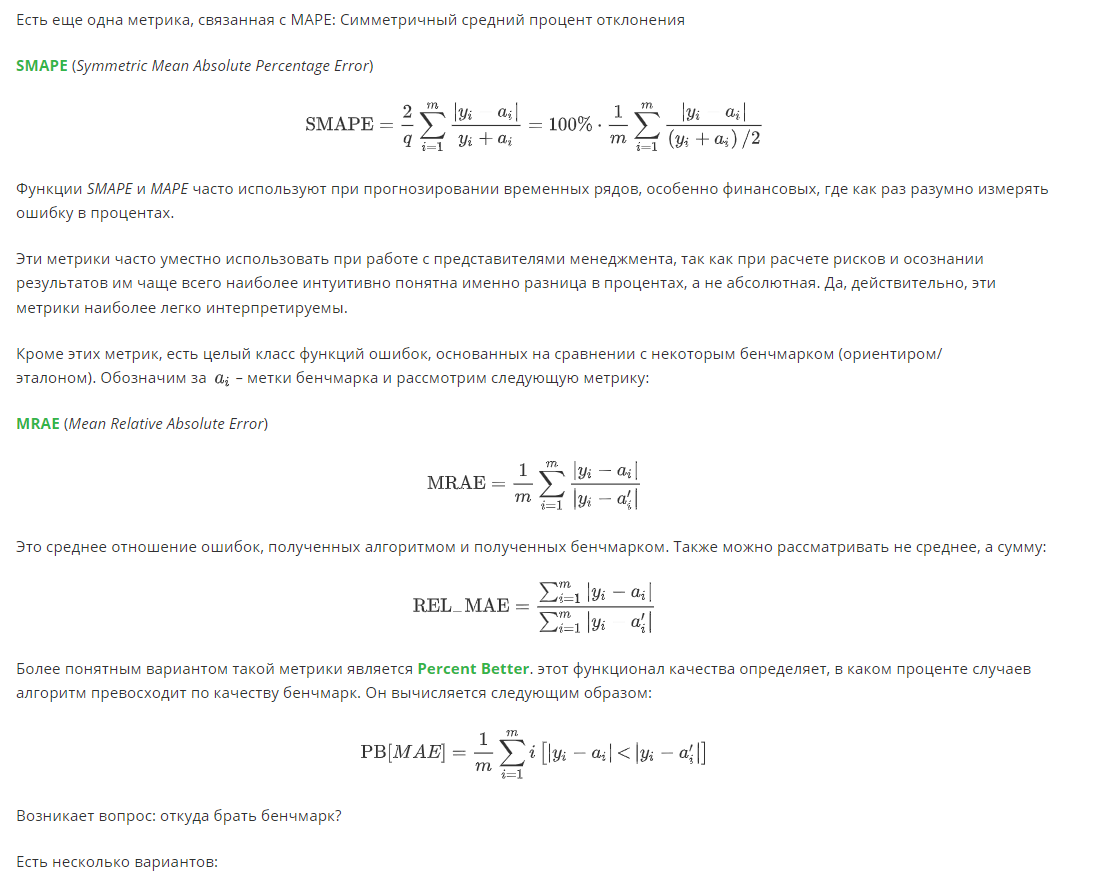

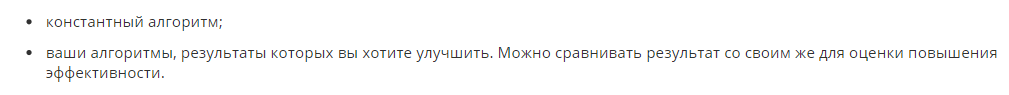

# Практика
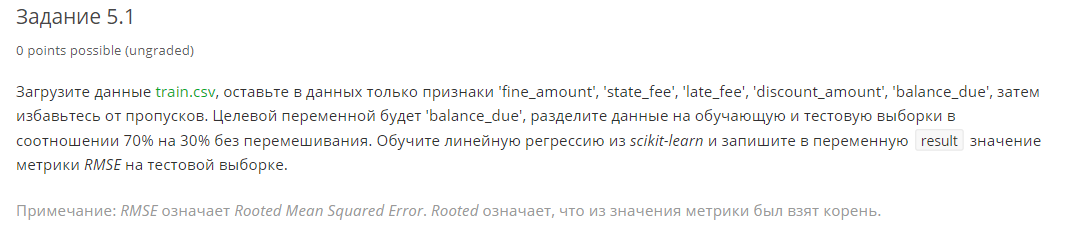

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
vis_data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
vis_data =vis_data.dropna()
X = vis_data.drop('balance_due',axis=1)
Y = vis_data[['balance_due']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,shuffle=False)
clf = LinearRegression()
clf.fit(X_train,y_train)
result = mean_squared_error(y_test, clf.predict(X_test))**0.5

# Метрики качества классификации
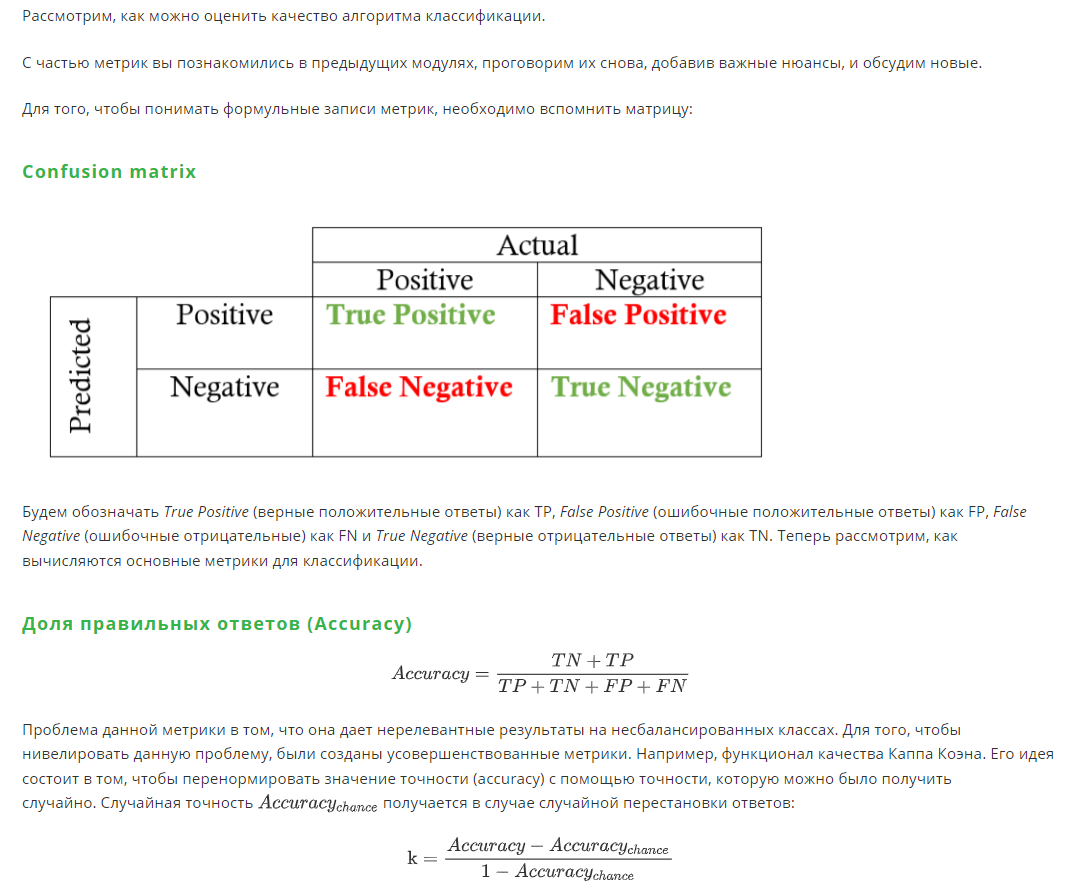

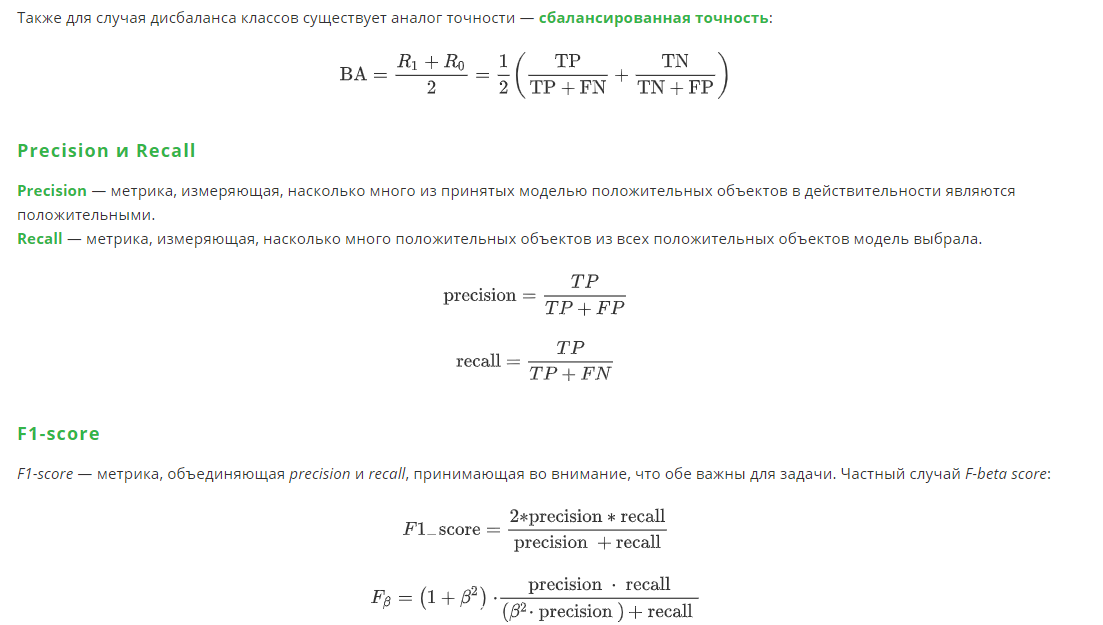

# Underfitting и overfitting

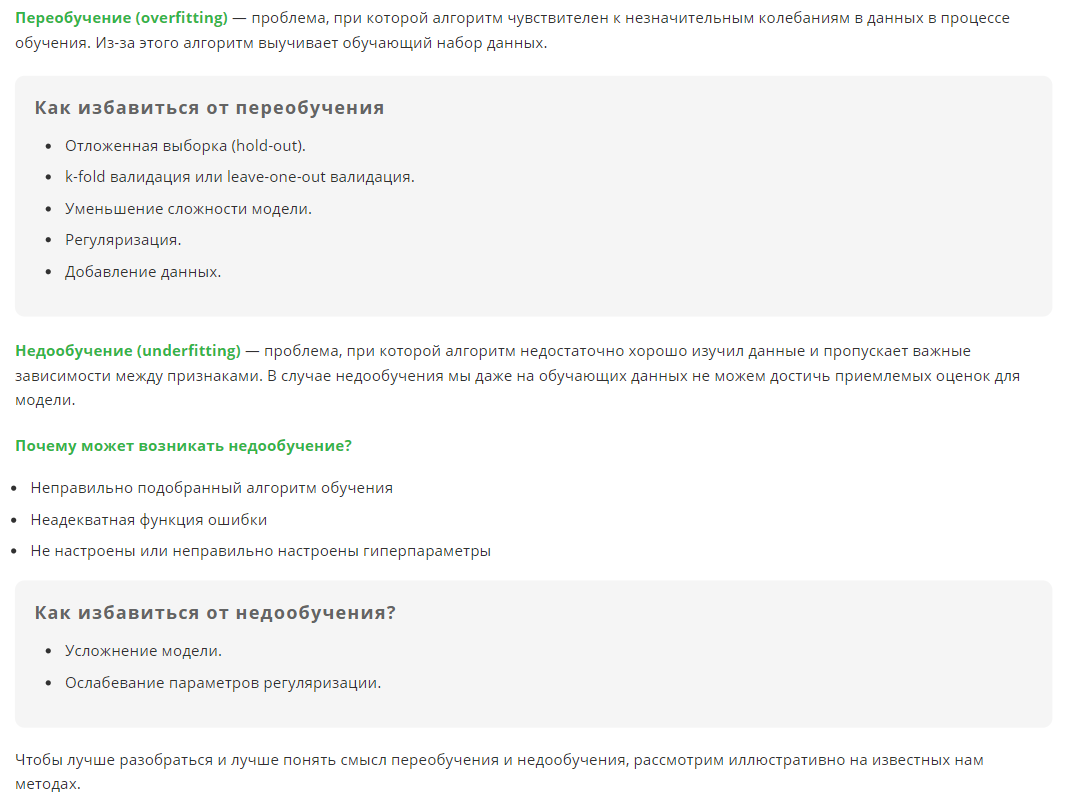

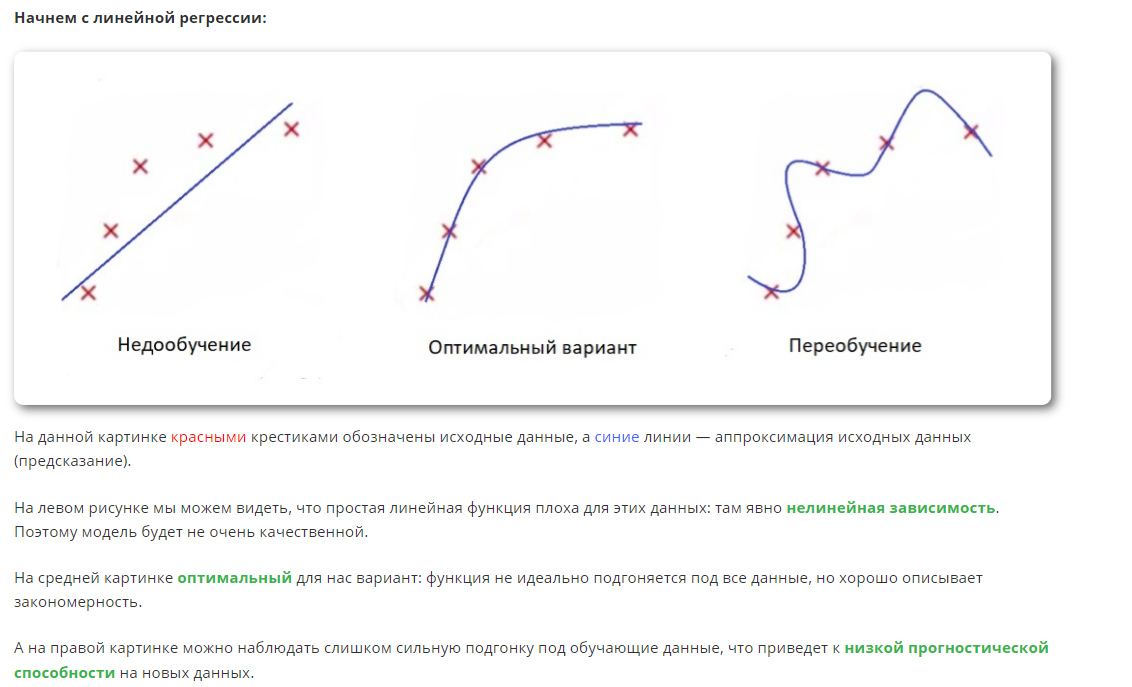

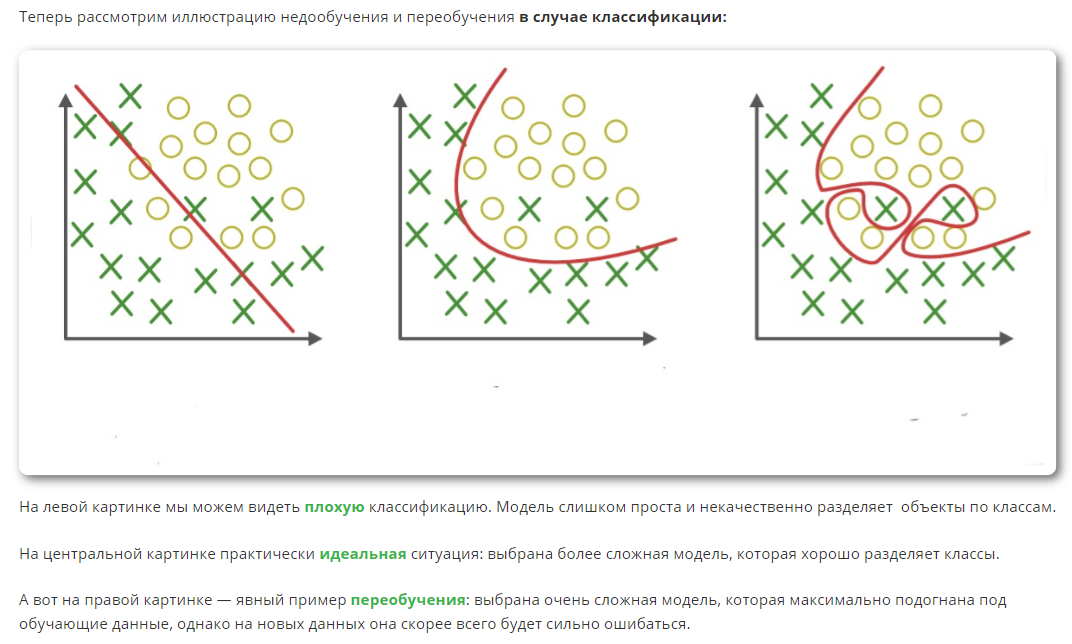

# Практика
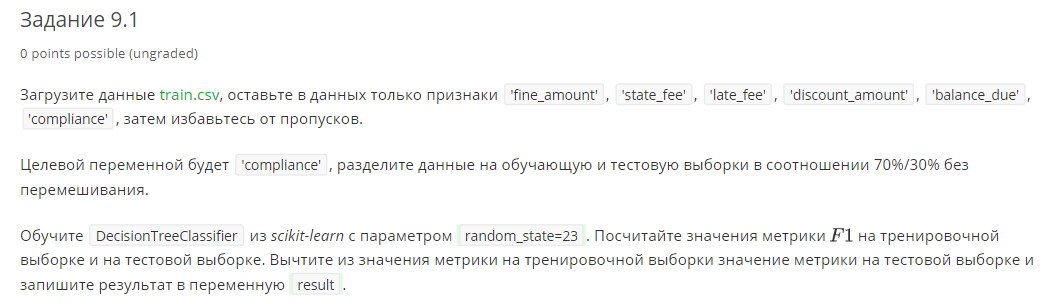

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
vis_data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due','compliance']]
vis_data =vis_data.dropna()
X = vis_data.drop('compliance',axis=1)
Y = vis_data[['compliance']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train,y_train)
result = f1_score(y_train,clf.predict(X_train))-f1_score(y_test, clf.predict(X_test))
result

0.08055341409051786

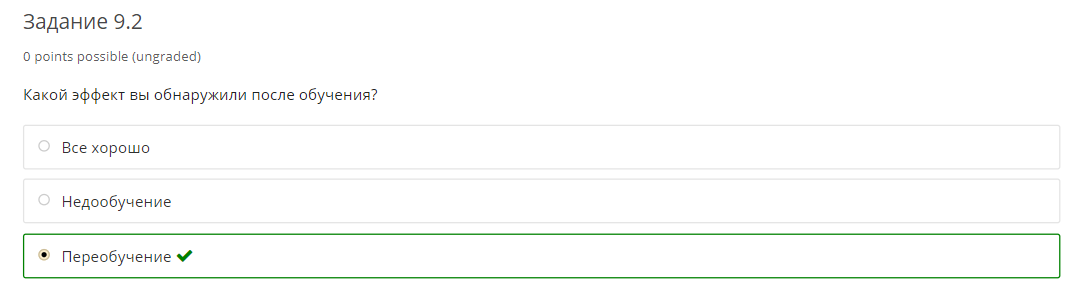

# Дисбаланс выборки
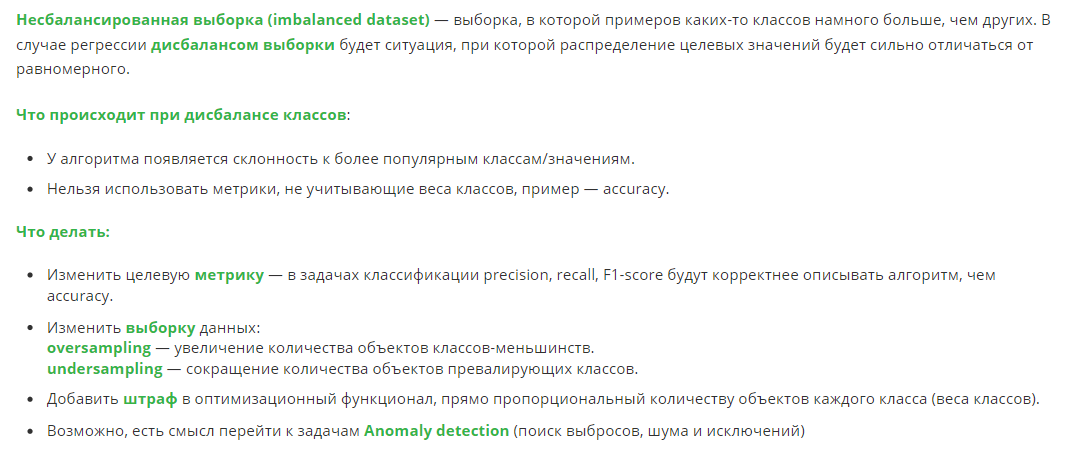

# Практика
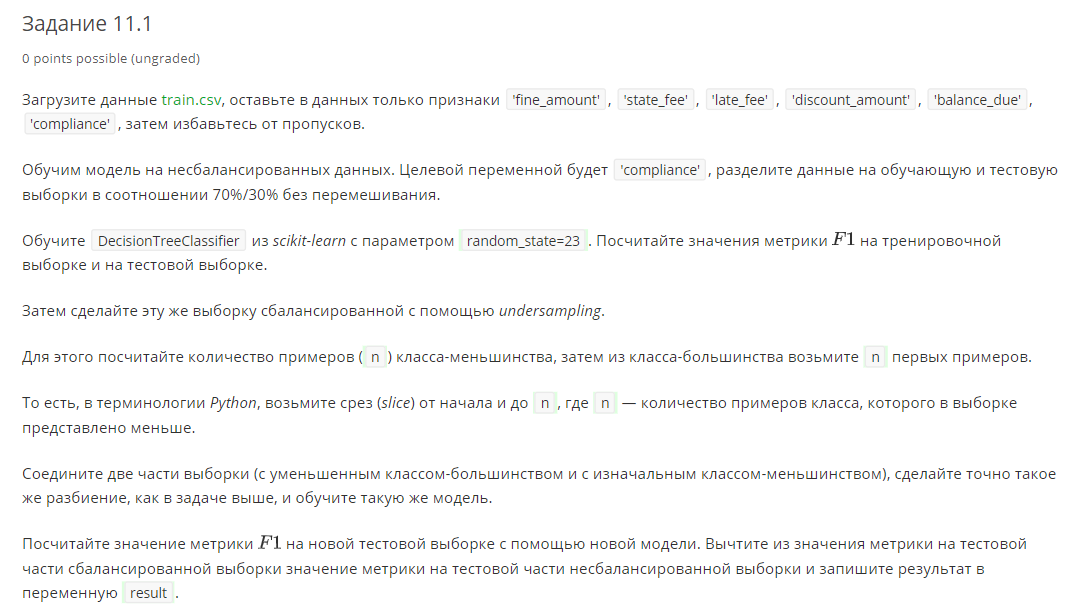

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score

vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
vis_data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due','compliance']]
vis_data =vis_data.dropna()
X = vis_data.drop('compliance',axis=1)
Y = vis_data[['compliance']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train,y_train)
result1 = f1_score(y_test, clf.predict(X_test))

minor = vis_data['compliance'].value_counts().min()

vis_data = pd.concat([vis_data[(vis_data['compliance']!=1)][:minor],vis_data[(vis_data['compliance']==1)]],axis=0)


X = vis_data.drop('compliance',axis=1)
Y = vis_data[['compliance']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,shuffle=False)
clf = DecisionTreeClassifier(random_state=23)
clf.fit(X_train,y_train)
result = f1_score(y_test, clf.predict(X_test))-result1
result

0.18272749967696011